In [1]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
#%matplotlib widget

#If you are using Jupyter Notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exercise 5.1: Noise and Correlation

As we learned in the lecture, every measurement will be disturbed by "noise". In the broadest sense of the term, it is any type of signal that we are not interested in.
However, most of the time we think of random signals when talking about noise.
This random nature of noise signals can be easily seen in its autocorrelation.

In this exercise we will try to build an intuitive understanding of autocorrelation and how its output changes based on different noise levels.

a) Create one function each that can produce (1) uniform random noise, (2) Gaussian random noise, and (3) deterministic sin wave based noise. See more guidance below.

b) Create an interactive plot using `ipywidgets` that allows to plot one of the 3 types of noise and allows to adjust the noise amplitude. 
Expand the visualization by plotting a cos signal in a second plot below the first one.
Add a third plot showing the cosine signal with the selected noise added to it.
You can use the subplot structure provided below for your plotting.

c) Add a fourth subplot that shows the **autocorrelation** of the signal in subplot 3.

d) Explain why the autocorrelation shows a center peak for Gaussian and uniform sampling, but not for the sin "noise".

### Solution:

d) The autocorrelation provides you information about how similar a signal is to itself shifted by a certain amount.
   In the very center, we have a shift of 0.
   By definition this results in a perfect overlap and hence, has a correlation of 1.
   If we see further peaks in the autocorrelation that get close to one, it indicates the signal has a periodic nature.
   Think about it that way: If we shift the signal by an amount $t$, it looks similar to the original signal again and hence has a high correlation.
   If we add random noise to a periodic signal, the signal will never be the same, even if we shift it exactly by one period of its original frequency.
   This means that the correlation with itself gets lower.
   Only at a shift of 0, we have perfect overlap, indicated by the large peak
   
   Note that the signal declines in both directions, because our signals are finite in time.
   This means, if we shift the signals, only part of the signal will overlap, which simply results in a smaller correlation value, as we ignore the parts of the signal that do not overlap.
   Compare this finding with the equation in the lecture.

In [2]:
def uniform_noise(amplitude, length):
    """Create uniform noise.
    
    Args:
        amplitude: amplitude is the max value, -amplitude is the min value
            of the random distribution
        length: length of the output
    
    Returns:
        noise: array of len `length` filled with random noise
    """
    ### BEGIN SOLUTION
    noise = np.random.uniform(-amplitude, amplitude, length)
    ### END SOLUTION
    return noise

def gaussian_noise(amplitude, length):
    """Create Gaussian noise.
    
    The Gaussian noise has a mean of 0 and a std of `amplitude`.
    
    Args:
        amplitude: std of the Gaussian distribution
        length: length of the output
    
    Returns:
        noise: array of len `length` filled with random noise
    """
    ### BEGIN SOLUTION
    noise = np.random.normal(0, amplitude, length)
    ### END SOLUTION
    return noise

def sin_noise(amplitude, length):
    """Create sin shaped "noise".
    
    The sin signal has 100 periods within the output signal.
    
    Args:
        amplitude: scaling factor of the sinus signal
        length: length of the output
    
    Returns:
        noise: array of len `length` filled with random noise
    """
    x = np.arange(length)
    ### BEGIN SOLUTION
    noise = amplitude * np.sin(x * 2*np.pi*100/length)
    ### END SOLUTION
    return noise

<IPython.core.display.Javascript object>


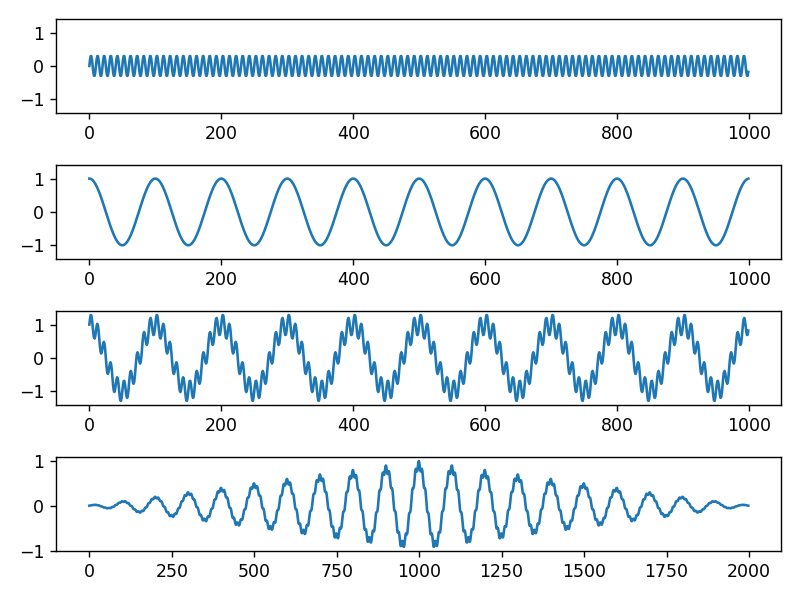

interactive(children=(Dropdown(description='noise_type', options=('uniform', 'gaussian', 'sin', None), value=N…

In [12]:
from ipywidgets import interact

noise_models = {'uniform': uniform_noise, 'gaussian': gaussian_noise, 'sin': sin_noise}
fig = plt.figure()
ax0 = plt.subplot(411)
ax1 = plt.subplot(412, sharey=ax0, sharex=ax0)
ax2 = plt.subplot(413, sharey=ax0, sharex=ax0)
ax3 = plt.subplot(414)

def noise_autocorrelation_plot(noise_type=None, amplitude=None):
    # The length of the output
    length = 1000
    
    ax0.clear()
    # Select a noise model and calculate a noise vector with the given
    # length and amplitude.
    # If `noise_type=None` the noise vectors should contain only zeros.
    ### BEGIN SOLUTION
    if noise_type:
        noise = noise_models[noise_type](amplitude, length)
    else:
        noise = np.zeros(length)
    ### END SOLUTION
    ax0.plot(noise)
    
    ax1.clear()
    # Create a cosine function with a period length of 100 samples
    ### BEGIN SOLUTION
    x = np.arange(length)
    cosine = np.cos(x * 2*np.pi * 1 / 100)
    ### END SOLUTION
    ax1.plot(cosine)
    
    ax2.clear()
    # Combine the cosine vector with the additative noise
    ### BEGIN SOLUTION
    signal = cosine + noise
    ### END SOLUTION
    ax2.plot(signal)
    
    ax3.clear()
    # Calculate the autoroccelation of signal and normalize it to a max value of 1
    # Note: Use mode='full' for the correlation
    ### BEGIN SOLUTION
    correlation = np.correlate(signal, signal, mode='full')
    correlation /= np.max(correlation)
    ### END SOLUTION
    ax3.plot(correlation)
    
    fig.tight_layout()

# Use interact to create the interactive plot. Noise types can either be None or any of the 3 noise models.
### BEGIN SOLUTION
interact(noise_autocorrelation_plot, noise_type=[*noise_models.keys(), None], amplitude=(0, 1, 0.01));
### END SOLUTION

## Exercise 5.2: Signal to Noise Ratio

To estimate the negative influence of noise on a measurement, and hence the maximal possible accuracy of our measurement, the Signal-to-Noise ratio (SNR) is used.

The SNR is defined by  $\frac{P_{signal}}{P_{noise}}$, where $P$ corresponds to the power of the signal. 
This means we need calculate the power of the noise and the signal separately.
Separating signal from noise to perform this calculation is not always easy.
A common approach is to find periods in the measured signal where no biologically relevant information is expected, i.e. pauses during a speech signal.
Ideally, our sensor should only measure noise during these periods.
This allows us to calculate the power of the noise and the signal (+noise) separately to estimate the SNR.

a) Which assumptions must hold for the noise in order to successfully use the described approach?

b) For this exercise we are using a set of microphone test files obtained from: [http://testing.holmerup.biz/microphones/](http://testing.holmerup.biz/microphones/). Load one of the files provided and plot its content

c) Use the cursor to manually identify the start and end indices of regions displaying primarily noise / primarily signal parts. Highlight these regions in your plot using `plt.axvspan()`

d) Compute the power of the signal, the power of the noise, and the SNR using the following equation: $P =\frac{1}{K} \sum_{i}^{K}S_i^2$.

e) Repeat the same procedure for the other `wav` files. Which microphone has the best SNR?

f) Depending on the application and the type of biosignal, other definitions for the SNR exist. The following two are commonly used:

$SNR  = \frac{\text{Amplitude of Signal}}{\text{Standard Deviation of Noise}} = \frac{A_{\text{Signal}}}{\sigma_{\text{Noise}}}$ Amplitude refers to peak-to-peak amplitude

$SNR  = \frac{\text{(Standard Deviation of Signal)}^2}{\text{(Standard Deviation of Noise)}^2} = \frac{\sigma^2_{\text{Signal}}}{\sigma^2_{\text{Noise}}}$

Try implementing them as well and compare the calculated SNRs to your results from the previous task.
Hint: You can approximate the amplitude of the signal by the peak-to-peak distance between its maximum and its minimum.

Which of these SNR definitions makes sense for Microphones?

### Solution:

a)

- The noise profile does not change during the measurement
- The noise does not scale with the signal
- The noise should be "small" in comparison to the signal, because we assume that $P_{signal+noise} \approx P_{signal}$ holds
- (Both signal and noise need need to be approx. gaussian, so that they are well characterized by mean and std)


Some general remarks about SNR:

- SNR is a theoretical measure, i.e. you will never be able to calculate it accurately
- Perfect calculation requires perfect separation of signal and noise. If you could do that, you don't have a noise problem anymore
- **BUT** you can still calculate a SNR with some assumptions and get a meaningful measure for the quality of your signal
- If you see/compare SNR measures, always check, how they are calculated, which assumptions were made, and if these assumptions hold for the types of noise you expect in the signal

e) The Oktava_MK012_LOMO_M3 has by far the best SNR.

f) All the provided measures can make sense, if they are used for relative comparison. When comparing microphones using the SNR it is important to always normalize for loudness first.

In [10]:
from scipy.io import wavfile

# Load one of the wavefiles and store the data in a variable called audio
### BEGIN SOLUTION
sample_rate, audio = wavfile.read('./data/2-Nevaton_MC48_loudspeakers.wav')
### END SOLUTION

# This prevents calculation errors later
audio = audio.astype(float)


<IPython.core.display.Javascript object>


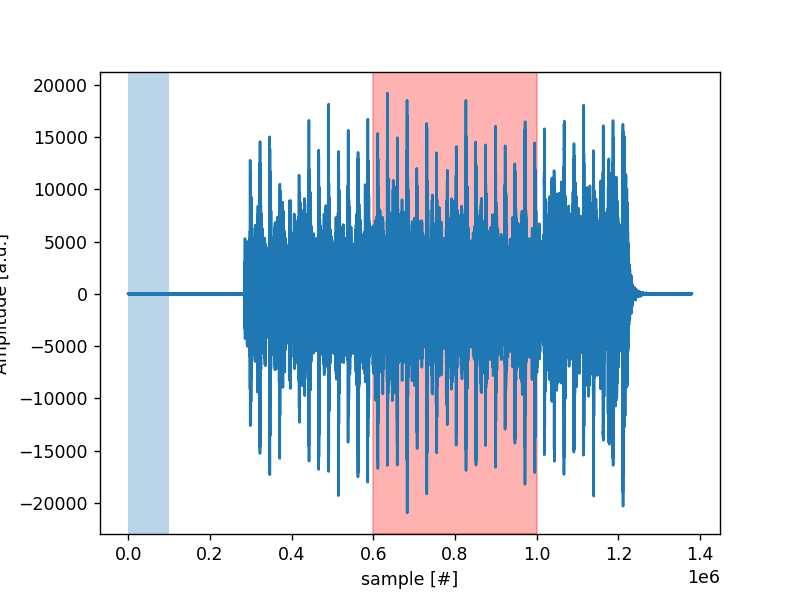

In [11]:
# Plot the signal
### BEGIN SOLUTION
plt.figure()
plt.plot(audio)
plt.xlabel('sample [#]')
plt.ylabel('Amplitude [a.u.]')
### END SOLUTION

# In the plot identify a region with just noise and just signal
# Store the start and stop indices like:
# noise_region = (start, stop)
# signal_region = (start, stop)
### BEGIN SOLUTION
noise_region = (0, 100000)
signal_region = (600000, 1000000)
### END SOLUTION

# Mark the regions in the plot using axvspan
### BEGIN SOLUTION
plt.axvspan(*noise_region, alpha=0.3)
plt.axvspan(*signal_region, alpha=0.3, color='red')
### END SOLUTION

In [6]:
def signal_power(signal):
    """Calculate the power of a signal
    
    Args:
        signal: 1D array
        
    Returns:
        power: power of the input signal
    """
    ### BEGIN SOLUTION
    power = 1 / len(signal) * np.sum(signal**2)
    ### END SOLUTION
    return power

def snr_1(noise, signal):
    """SNR based on signal power.
    
    Args:
        noise: 1D array containing only noise
        signal: 1D array containing only signal
        
    Returns:
        snr: signal to noise ration
    """
    ### BEGIN SOLUTION
    power_noise = signal_power(noise)
    power_signal = signal_power(signal)
    snr = power_signal / power_noise
    ### END SOLUTION
    return snr

print('SNR 1:', snr_1(audio[noise_region[0]:noise_region[1]], audio[signal_region[0]:signal_region[1]]))

SNR 1: 110502.64707268112


In [7]:
from pathlib import Path

# Run the calculation for all signals.
# You can use the same regions for all files if they were chosen correctly
# Store the results in a dictionary with the filename as key
all_snr = {}

### BEGIN SOLUTION
for f in Path('./data').glob('*wav'):
    _, audio = wavfile.read(f)
    audio = audio.astype(float)
    all_snr[f.stem.rsplit('_', 1)[0]] = snr_1(audio[noise_region[0]:noise_region[1]], audio[signal_region[0]:signal_region[1]])
### END SOLUTION

# Display the results
all_snr

{'2-ADK_A48_omni': 18933.48966907253,
 '2-Nevaton_MC48': 110502.64707268112,
 '3-Oktava_MK012_LOMO_M3': 252687.5150478067}

In [8]:
# Implement the other two SNR methods

def snr_2(noise, signal):
    """SNR based on signal peak-to-peak amplitude.
    
    Args:
        noise: 1D array containing only noise
        signal: 1D array containing only signal
        
    Returns:
        snr: signal to noise ration
    """
    ### BEGIN SOLUTION
    amp_signal = np.max(signal) - np.min(signal)
    noise_std = np.std(noise)
    snr = amp_signal / noise_std
    ### END SOLUTION
    return snr

def snr_3(noise, signal):
    """SNR based on signal std.
    
    Args:
        noise: 1D array containing only noise
        signal: 1D array containing only signal
        
    Returns:
        snr: signal to noise ration
    """
    ### BEGIN SOLUTION
    noise_std = np.std(noise)
    signal_std = np.std(signal)
    snr = signal_std**2 / noise_std**2
    ### END SOLUTION
    return snr

In [9]:
# Compare all three methods over all files provided
all_snr = {}

### BEGIN SOLUTION
for f in Path('./data').glob('*wav'):
    _, audio = wavfile.read(f)
    audio = audio.astype(float)
    key = f.stem.rsplit('_', 1)[0]
    all_snr[key] = {}
    all_snr[key]['snr_1'] = snr_1(audio[noise_region[0]:noise_region[1]], audio[signal_region[0]:signal_region[1]])
    all_snr[key]['snr_2'] = snr_2(audio[noise_region[0]:noise_region[1]], audio[signal_region[0]:signal_region[1]])
    all_snr[key]['snr_3'] = snr_3(audio[noise_region[0]:noise_region[1]], audio[signal_region[0]:signal_region[1]])
### END SOLUTION

# Display the results
pd.DataFrame(all_snr).T

,snr_1,snr_2,snr_3
2-ADK_A48_omni,18933.489669,1580.406337,18933.961055
2-Nevaton_MC48,110502.647073,4175.021696,110507.472540
3-Oktava_MK012_LOMO_M3,252687.515048,6880.771864,252687.606418


## Exercise 5.3: Managing Noise

Managing noise and artifacts starts with the experimental design, not with the data.
Brainstorm a couple of general ideas on how to prevent/handle noise in typical biosignal measurements.

For example, think about how to prevent movement artifacts during ECG, why we use reference electrodes, etc.

### Solution:

1. Choose methods that are independent of a noise source:
    E.g. don't use cameras for motion capture when you have bad lighting conditions, use IMUs instead
2. Minimize the influence of noise:
    E.g. if you need to use a microphone, built a sound proof room
3. Measure your noise:
    Try to quantify the noise of your signal independently of your measurement (i.e. baseline measurements, reference measurements, relative measures in general)
4. Model you noise:
    If everything else fails, try to make assumption about the nature and quantity of your noise. This can help to choose the right means to clean your data later.
